# Importing Libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset

In [2]:
df=pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# peeking at the dataset

In [3]:
#checking the column names
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
#checking shape
df.shape

(1453, 15)

In [5]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
#checking if there are any missing values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
def create_piechart(data, column):
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
   
    plt.pie(sizes, 
            labels=labels, 
            autopct='%1.2f%%',
            shadow=False, 
            startangle=45)
    
    plt.axis('equal')  
    plt.title("Piechart - {}".format(column))
    plt.show()

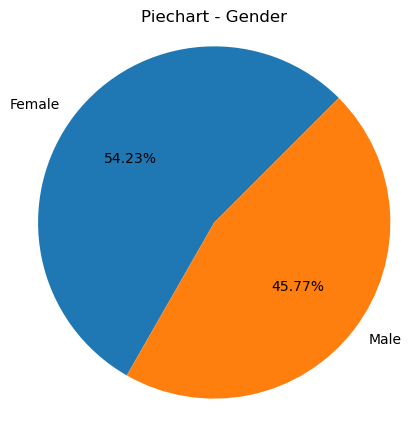

In [10]:
plt.figure(figsize=(5,5))
create_piechart(df, "Gender")

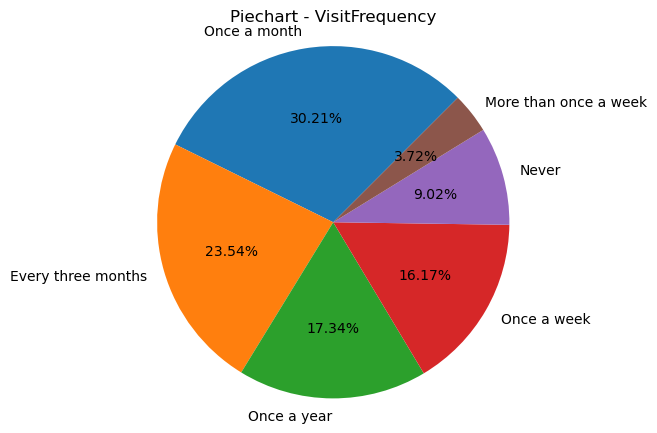

In [11]:
plt.figure(figsize=(5,5))
create_piechart(df, "VisitFrequency")

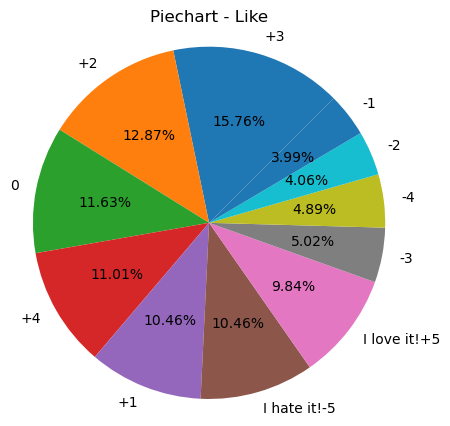

In [12]:
plt.figure(figsize=(5,5))
create_piechart(df, "Like")

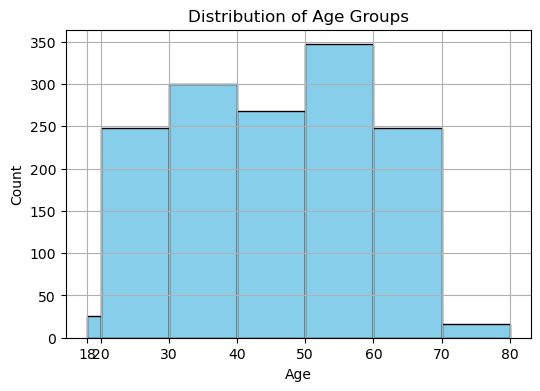

In [13]:
bins=[18,20,30,40,50,60,70,80]

plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(bins)
plt.grid(True)
plt.show()

# Preprocess your data (handle missing values if any, encode categorical variables, standardize data)

In [14]:
# Converting categorical data into numerical form

from sklearn.preprocessing import LabelEncoder

df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

# Instantiate the encoder
label_encoder = LabelEncoder()

# Iterate over each column and apply label encoding
df_encoded= df_new.apply(LabelEncoder().fit_transform)

print(df_encoded)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

# Standardise the data

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (optional but recommended)

data_array = df_encoded.values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)

# Check the shape of the standardized data
print("Shape of standardized data:", data_scaled.shape)

Shape of standardized data: (1453, 11)


# Performing PCA

In [16]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=11)  # You can specify the number of components you want
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame to visualize the results
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

print(principal_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.704334 -0.437016  0.268698 -0.872074 -1.521184  0.470160 -0.030969   
1 -0.467820  0.364277 -1.596835 -0.004835  0.462385 -0.449321  0.087351   
2  0.191986  1.712949 -0.339413  3.368168 -1.266802  0.148058 -0.606634   
3 -0.116991 -1.155122 -1.003913  0.469589  1.141750 -0.857182  0.015843   
4 -0.034724 -1.390267  0.792275  0.473031 -0.270488 -0.847963 -1.804085   

        PC8       PC9      PC10      PC11  
0 -0.687116  0.367598  0.321161  1.701170  
1  0.446003  0.221855  0.191268  1.467681  
2 -0.668576  1.377226 -1.259300 -0.128530  
3  0.390275 -1.578539  0.092189 -0.233201  
4 -0.700019  1.630339  0.092449 -0.033144  


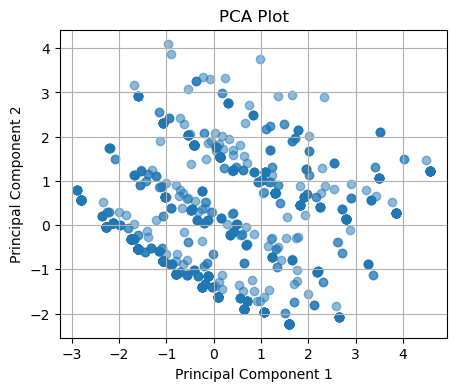

Explained Variance Ratio: [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Projection Axes:
[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]
 [-0.25958798 -0.31715142  0.0201696  -0.60807736 -0.38956798 -0.21139458
   0.1251574  -0.26964779 -0.18329788  0.36781371  0.09029919]
 [ 0.02623694 -0.00942396  0.84549641 -0.02339555  0.33085439  0.09036315
   0.11447698  0.0726908   0.03550987  0.30198954  0.23523093]
 [ 0.34685741 -0.43714795 -0.185551    0.08693385  0.3437128  -0.56893862
   0.25698101  0.2860986  -0.20736179  0.05178742  0.10584327]
 [-0.12491568  0.18896641  0.43866119  0.1075199  -0.27832865 -0.57273434
   0.02065707 -0.05305267 -0.17116009 -0.4461664  -0.32804054]
 [ 0.159878

In [17]:
plt.figure(figsize=(5, 4))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.grid(True)
plt.show()

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Projection Axes
print("Projection Axes:")
print(pca.components_)

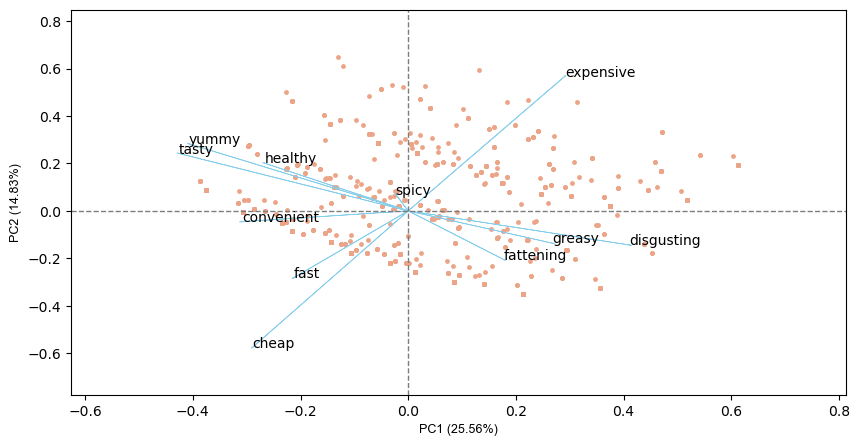

In [18]:
from bioinfokit.visuz import cluster
loadings = pca.components_
# get PC scores
pca_scores = PCA().fit_transform(principal_df)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

# Extracting Segments using K-Means

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

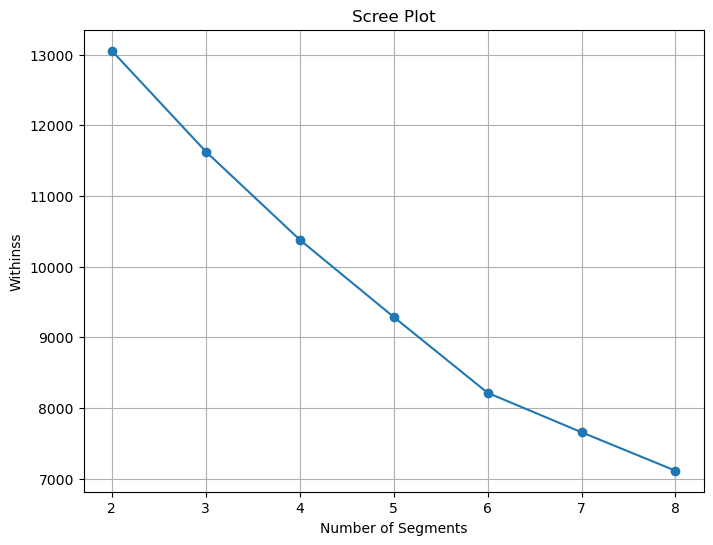

In [20]:
# Set the random seed for reproducibility
np.random.seed(1234)

# Perform K-means clustering with different numbers of clusters and multiple repetitions
withinss_values = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(data_scaled)
    withinss_values.append(kmeans.inertia_)

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), withinss_values, marker='o', linestyle='-')
plt.xlabel('Number of Segments')
plt.ylabel('Withinss')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [21]:
from bootstrapped import bootstrap as bs
from bootstrapped import stats_functions as bs_stats
from sklearn.metrics import adjusted_rand_score
from collections import Counter

In [22]:
# k-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558945
No. of iterations:  8
Cluster centroids:  [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


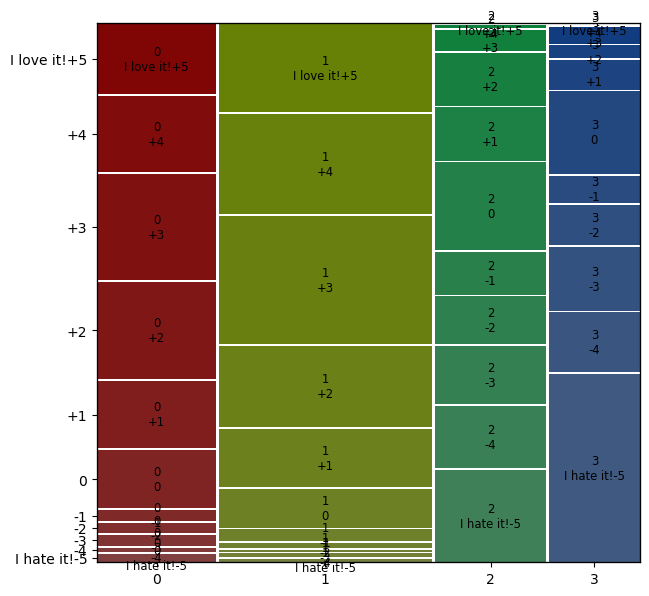

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


None

In [23]:
from statsmodels.graphics.mosaicplot import mosaic

# crosstab creation
crosstab = pd.crosstab(df['cluster_num'], df['Like'])
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

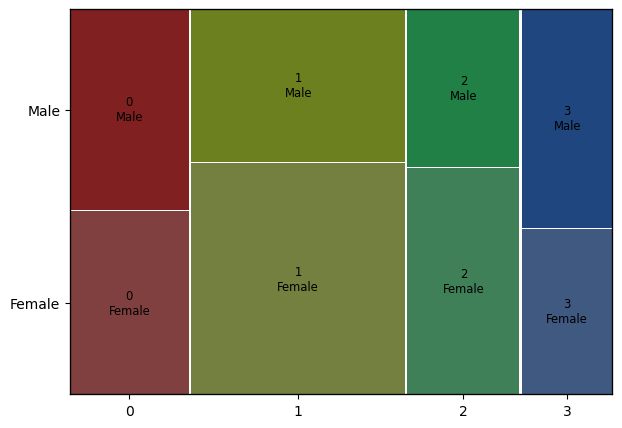

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


None

In [24]:
# crosstab creation
crosstab_gender = pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

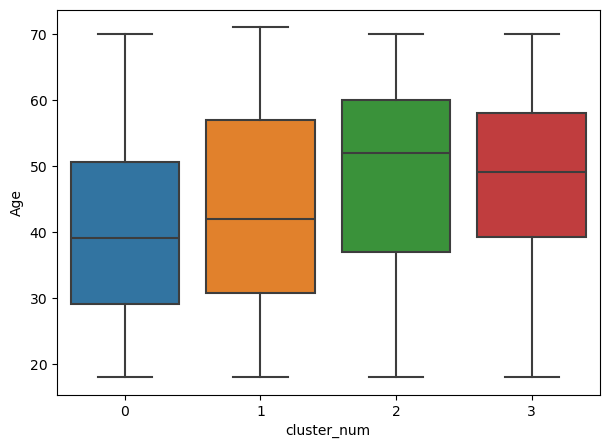

In [25]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=df);

# Selecting the Target Segment

In [26]:
# calculating the mean of 'VisitFrequency'
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [27]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [28]:
# calculating the mean of 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [29]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


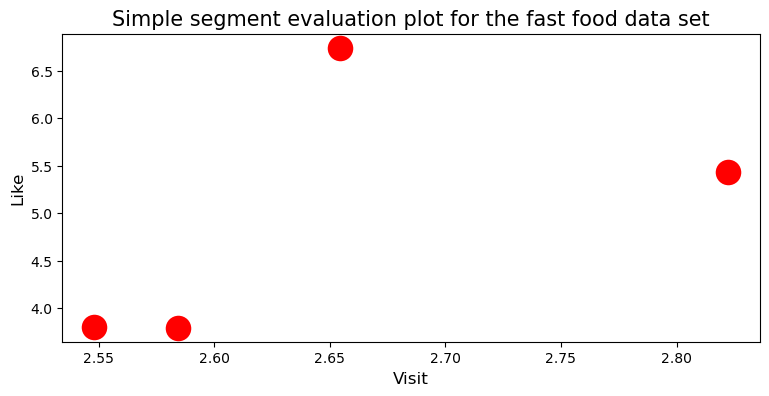

In [30]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()